### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Calcular ingresos
ingresos_por_tienda = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Imprimir ingreso por tienda
for nombre_tienda, ingreso in ingresos_por_tienda.items():
    print(f'{nombre_tienda}: ${ingreso:,.2f}')


Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


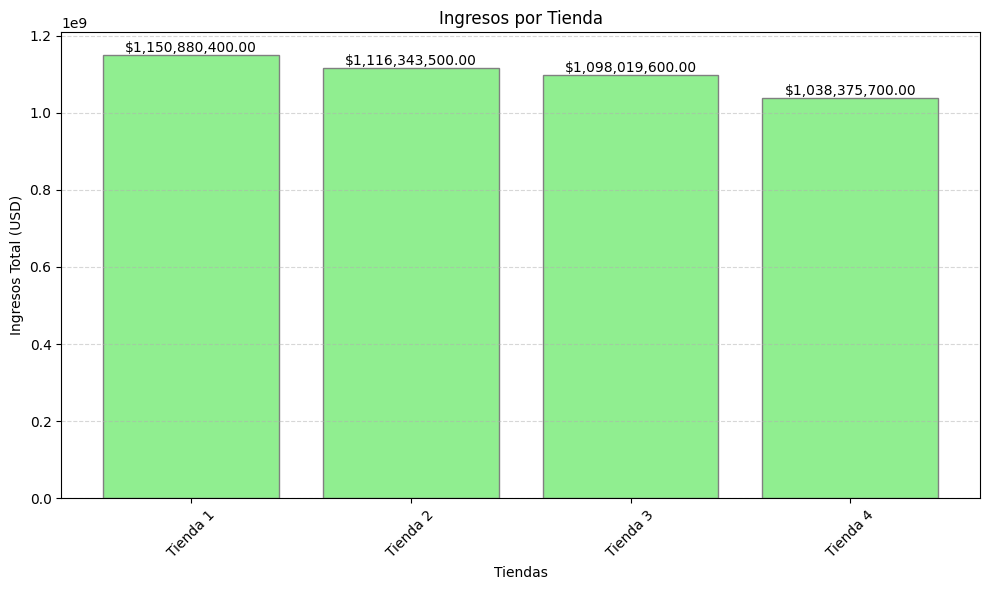

In [ ]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
# Datos
tiendas = list(ingresos_por_tienda.keys())
ingresos = list(ingresos_por_tienda.values())

# Gráfica
plt.figure(figsize=(10, 6))
plt.bar(tiendas, ingresos, color='lightgreen', edgecolor='grey')

# Estilo Gráfico
plt.title('Ingresos por Tienda')
plt.ylabel('Ingresos Total (USD)')
plt.xlabel('Tiendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar valores sobre cada barra
for i, v in enumerate(ingresos):
    plt.text(i, v + 1000, f'${v:,.2f}', ha='center', va='bottom')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# AGrupar por categoría y contar las ventas en cada tienda
ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto').size()
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size()
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size()
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size()

# Imprimir resultados
print("Ventas por categoría en Tienda 1:\n", ventas_categoria_tienda1)
print("\nVentas por categoría en Tienda 2:\n", ventas_categoria_tienda2)
print("\nVentas por categoría en Tienda 3:\n", ventas_categoria_tienda3)
print("\nVentas por categoría en Tienda 4:\n", ventas_categoria_tienda4)

Ventas por categoría en Tienda 1:
 Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64

Ventas por categoría en Tienda 2:
 Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
dtype: int64

Ventas por categoría en Tienda 3:
 Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
dtype: int64

Ventas por categoría en Tienda 4:
 Categ

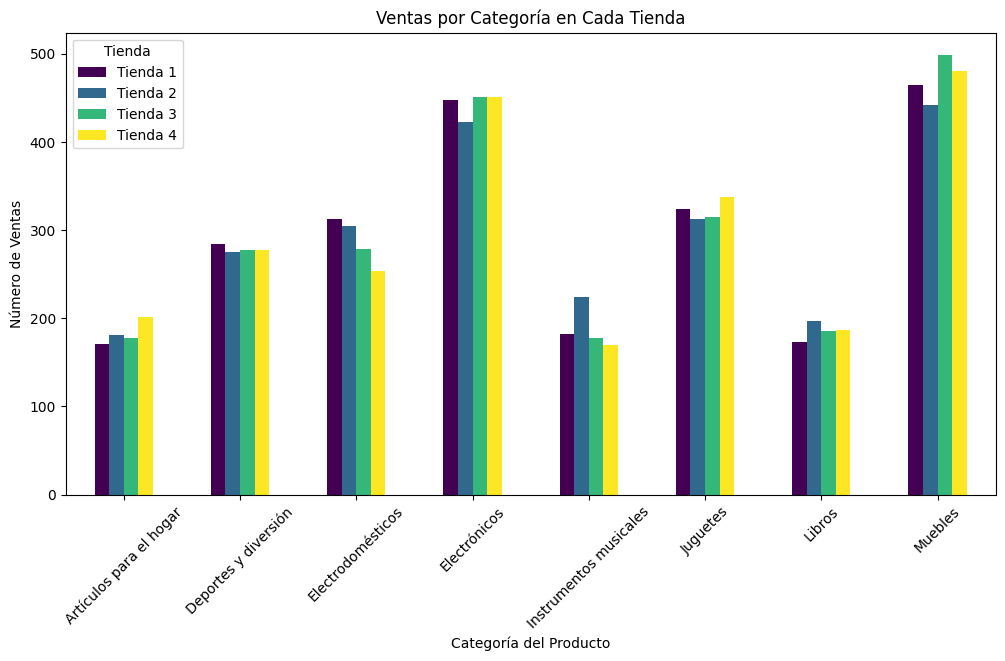

In [ ]:
import matplotlib.pyplot as plt

# Crear dataframe con las ventas por categoria
ventas_combinadas = pd.DataFrame({
    'Tienda 1': ventas_categoria_tienda1,
    'Tienda 2': ventas_categoria_tienda2,
    'Tienda 3': ventas_categoria_tienda3,
    'Tienda 4': ventas_categoria_tienda4
}).fillna(0)


# Graficar ventas por categoria
ventas_combinadas.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Ventas por Categoría en Cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Tienda')

In [ ]:
#Categoria más popular en cada tienda

categoria_top1 = ventas_categoria_tienda1.idxmax()
ventas_top1 = ventas_categoria_tienda1.max()
categoria_top2 = ventas_categoria_tienda2.idxmax()
ventas_top2 = ventas_categoria_tienda2.max()
categoria_top3 = ventas_categoria_tienda3.idxmax()
ventas_top3 = ventas_categoria_tienda3.max()
categoria_top4 = ventas_categoria_tienda4.idxmax()
ventas_top4 = ventas_categoria_tienda4.max()

print("🏪 Categoría más popular por tienda: \n")
print(f"Tienda 1: {categoria_top1} con {ventas_top1} ventas")
print(f"Tienda 2: {categoria_top2} con {ventas_top2} ventas")
print(f"Tienda 3: {categoria_top3} con {ventas_top3} ventas")
print(f"Tienda 4: {categoria_top4} con {ventas_top4} ventas")

🏪 Categoría más popular por tienda: 

Tienda 1: Muebles con 465 ventas
Tienda 2: Muebles con 442 ventas
Tienda 3: Muebles con 499 ventas
Tienda 4: Muebles con 480 ventas


# 3. Calificación promedio de la tienda


In [ ]:
# Calcular la calificación promedio por tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Resultados
print("🌟 Valoración media por tienda: \n")
print(f"Tienda 1 -> {calificacion_promedio_tienda1:.2f}")
print(f"Tienda 2 -> {calificacion_promedio_tienda2:.2f}")
print(f"Tienda 3 -> {calificacion_promedio_tienda3:.2f}")
print(f"Tienda 4 -> {calificacion_promedio_tienda4:.2f}")

🌟 Valoración media por tienda: 

Tienda 1 -> 3.98
Tienda 2 -> 4.04
Tienda 3 -> 4.05
Tienda 4 -> 4.00


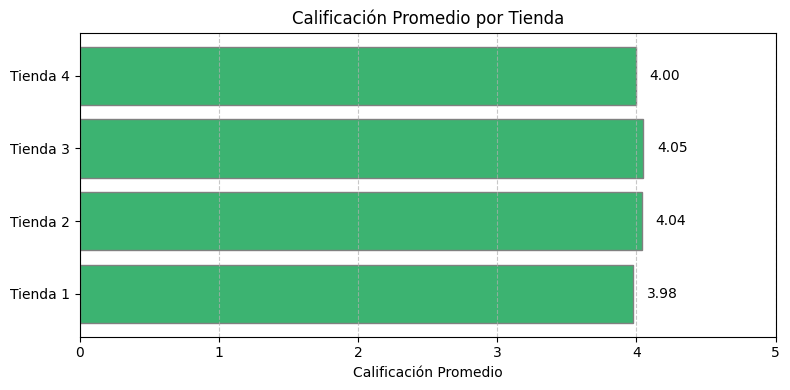

In [ ]:
# Gráfico de barras horizontales
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]

plt.figure(figsize=(8, 4))
plt.barh (tiendas, calificaciones_promedio, color='mediumseagreen', edgecolor='grey')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.xlim(0,5)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar valores al final de cada barra
for i, calificacion in enumerate(calificaciones_promedio):
    plt.text(calificacion + 0.1, i, f'{calificacion:.2f}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Resumen de satisfacción del cliente
promedios = {
    'Tienda 1': calificacion_promedio_tienda1,
    'Tienda 2': calificacion_promedio_tienda2,
    'Tienda 3': calificacion_promedio_tienda3,
    'Tienda 4': calificacion_promedio_tienda4
}

print("\nResumen de Satisfacción del Cliente:")
print(f"✅ Mayor satisfación: {max(promedios, key=promedios.get)} ({promedios[max(promedios, key=promedios.get)]:.2f})")
print(f"❌ Menor satisfación: {min(promedios, key=promedios.get)} ({promedios[min(promedios, key=promedios.get)]:.2f})")


Resumen de Satisfacción del Cliente:
✅ Mayor satisfación: Tienda 3 (4.05)
❌ Menor satisfación: Tienda 1 (3.98)


# 4. Productos más y menos vendidos

In [ ]:
def productos_mas_menos_vendidos(tienda_df, nombre_tienda):
    ventas_por_prodcuto = tienda_df['Producto'].value_counts()
    producto_mas_vendido = ventas_por_prodcuto.idxmax()
    cantidad_mas_vendido = ventas_por_prodcuto.max()

    producto_menos_vendido = ventas_por_prodcuto.idxmin()
    cantidad_menos_vendido = ventas_por_prodcuto.min()

    print(f"\nProductos más y menos vendidos en {nombre_tienda}:")
    print(f"✅ Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} ventas)")
    print(f"⚠️ Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} venta{'s' if cantidad_menos_vendido > 1 else ''})")
    return ventas_por_prodcuto

# Consultar para cada tienda
ventas_t1 = productos_mas_menos_vendidos(tienda, 'Tienda 1')
ventas_t2 = productos_mas_menos_vendidos(tienda2, 'Tienda 2')
ventas_t3 = productos_mas_menos_vendidos(tienda3, 'Tienda 3')
ventas_t4 = productos_mas_menos_vendidos(tienda4, 'Tienda 4')


Productos más y menos vendidos en Tienda 1:
✅ Producto más vendido: Microondas (60 ventas)
⚠️ Producto menos vendido: Auriculares con micrófono (33 ventas)

Productos más y menos vendidos en Tienda 2:
✅ Producto más vendido: Iniciando en programación (65 ventas)
⚠️ Producto menos vendido: Juego de mesa (32 ventas)

Productos más y menos vendidos en Tienda 3:
✅ Producto más vendido: Kit de bancas (57 ventas)
⚠️ Producto menos vendido: Bloques de construcción (35 ventas)

Productos más y menos vendidos en Tienda 4:
✅ Producto más vendido: Cama box (62 ventas)
⚠️ Producto menos vendido: Guitarra eléctrica (33 ventas)


In [ ]:
datos_productos = []
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
    ventas_por_producto = tienda_df['Producto'].value_counts()
    max_ventas = ventas_por_producto.max()
    min_ventas = ventas_por_producto.min()

    producto_mas = ventas_por_producto[ventas_por_producto == max_ventas].index[0]
    producto_menos = ventas_por_producto[ventas_por_producto == min_ventas].index[0]

    datos_productos.append({
        'Tienda': nombre,
        'Producto Más Vendido': producto_mas,
        'Ventas del Producto Más Vendido': max_ventas,
        'Producto Menos Vendido': producto_menos,
        'Ventas del Producto Menos Vendido': min_ventas
    })

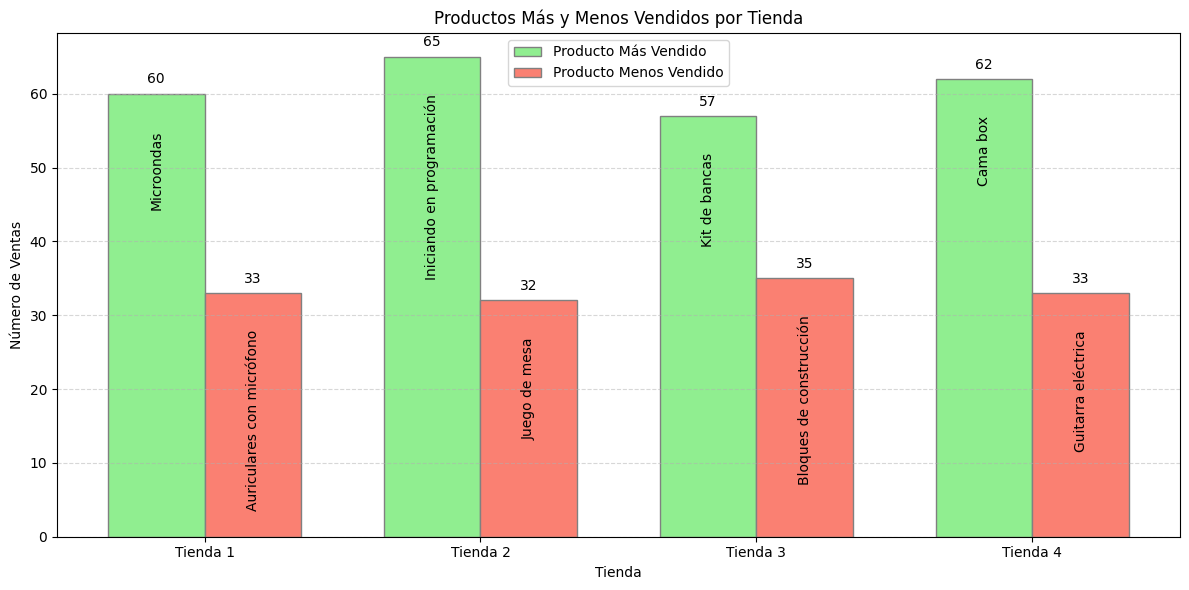

In [ ]:
import numpy as np
# Preparar datos
tiendas = [d['Tienda'] for d in datos_productos]
ventas_mas = [d['Ventas del Producto Más Vendido'] for d in datos_productos]
ventas_menos = [d['Ventas del Producto Menos Vendido'] for d in datos_productos]

x = np.arange(len(tiendas))  # Posiciones de las tiendas en el eje x
width = 0.35  # Ancho de las barras

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, ventas_mas, width, label='Producto Más Vendido', color='lightgreen', edgecolor='grey')
plt.bar(x + width/2, ventas_menos, width, label='Producto Menos Vendido', color='salmon', edgecolor='grey')

# Añadir etiquetas y título
plt.xlabel('Tienda')
plt.ylabel('Número de Ventas')
plt.title('Productos Más y Menos Vendidos por Tienda')
plt.xticks(x, tiendas)
plt.legend()

# Etiquetas de las barras
for i in range(len(tiendas)):
    plt.text(x[i] - width/2, ventas_mas[i] + 1, str(ventas_mas[i]), ha='center', va='bottom')
    plt.text(x[i] + width/2, ventas_menos[i] + 1, str(ventas_menos[i]), ha='center', va='bottom')
    plt.text(x[i] - width/2, ventas_mas[i] - 5, datos_productos[i]['Producto Más Vendido'], ha='center', va='top', rotation=90)
    plt.text(x[i] + width/2, ventas_menos[i] - 5, datos_productos[i]['Producto Menos Vendido'], ha='center', va='top', rotation=90)
# Mostrar gráfico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 5. Envío promedio por tienda

In [ ]:
# Calcular el envio promedio por tienda
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Diccionario para facil manejo
envios_promedio = {
    'Tienda 1': envio_promedio_tienda1,
    'Tienda 2': envio_promedio_tienda2,
    'Tienda 3': envio_promedio_tienda3,
    'Tienda 4': envio_promedio_tienda4
}

# Resultados
print("🚚 Envío promedio por tienda: \n")
for tienda, envio in envios_promedio.items():
    print(f"{tienda} -> ${envio:.2f}")

🚚 Envío promedio por tienda: 

Tienda 1 -> $26018.61
Tienda 2 -> $25216.24
Tienda 3 -> $24805.68
Tienda 4 -> $23459.46


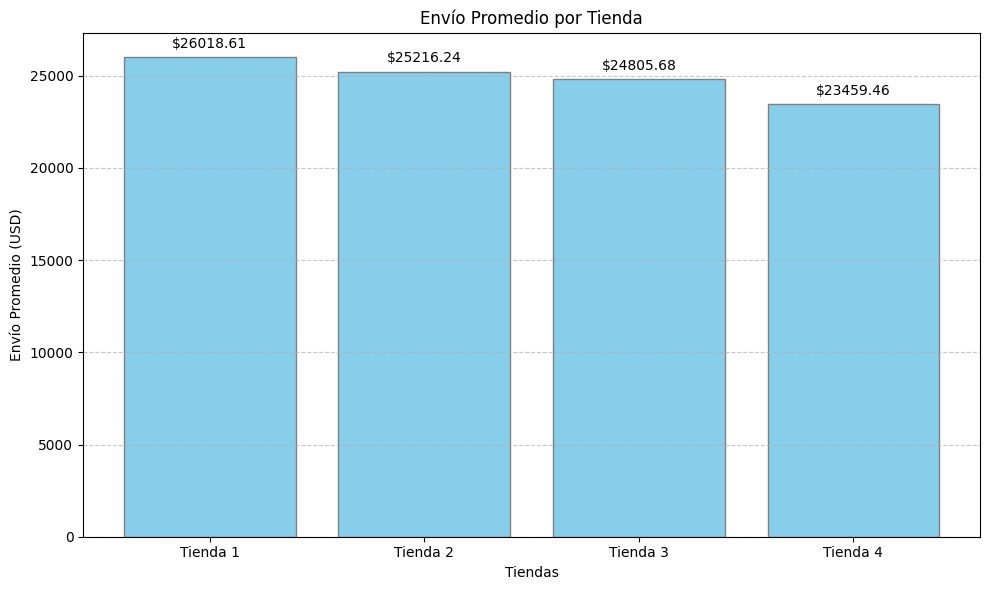

In [ ]:
# Datos
tiendas = list(envios_promedio.keys())
envios = list(envios_promedio.values())

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tiendas, envios, color='skyblue', edgecolor='grey')
plt.title('Envío Promedio por Tienda')
plt.ylabel('Envío Promedio (USD)')
plt.xlabel('Tiendas')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre cada barra
for i, costo in enumerate(envios):
    plt.text(i, costo + 500, f'${costo:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

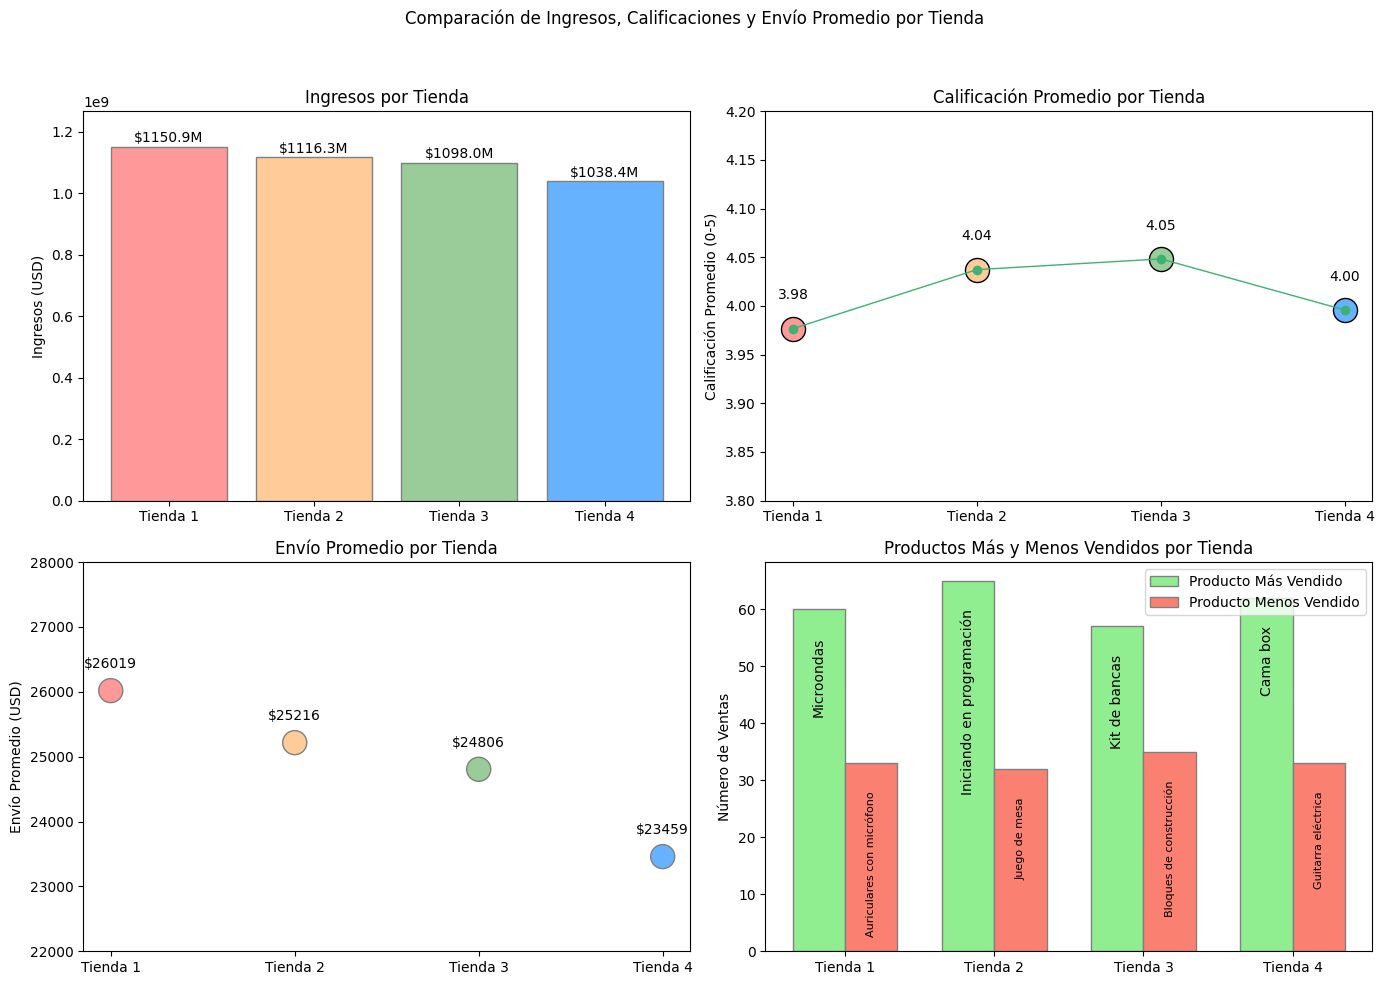

In [ ]:
# Peparar datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = list(ingresos_por_tienda.values())
calificaciones = calificaciones_promedio
envios = list(envios_promedio.values())

# Paleta de colores por tienda
colores = {
    'Tienda 1': '#FF9999',
    'Tienda 2': '#FFCC99',
    'Tienda 3': '#99CC99',
    'Tienda 4': '#66B2FF'
}
colores_lista = [colores[t] for t in tiendas]

# Crear gráfico de barras agrupadas
x = np.arange(len(tiendas))  # Posiciones de las tiendas en el eje x

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = np.array(axs)
fig.suptitle('Comparación de Ingresos, Calificaciones y Envío Promedio por Tienda')

# Gráfico de Ingresos
axs[0,0].bar(tiendas, ingresos, color= colores_lista, edgecolor='grey')
axs[0,0].set_ylabel('Ingresos (USD)')
axs[0,0].set_title('Ingresos por Tienda')
axs[0,0].set_ylim(0, max(ingresos) * 1.1)
for i, v in enumerate(ingresos):
    axs[0,0].text(i, v + 5e6, f'${v/1e6:.1f}M', ha='center', va='bottom', fontsize=10)

# Gráfico de Calificaciones
axs[0,1].plot(tiendas, calificaciones, color='mediumseagreen', marker='o', linewidth = 1)
axs[0,1].set_ylabel('Calificación Promedio (0-5)')
axs[0,1].set_ylim(3.8, 4.2)
axs[0,1].set_title('Calificación Promedio por Tienda')
for i, (tienda,val) in enumerate(zip(tiendas,calificaciones)):
    axs[0,1].scatter(i, val, color=colores[tienda], s=300, edgecolor='black')
    axs[0,1].text(i, val + 0.03, f'{val:.2f}', ha='center', fontsize=10)

# Gráfico de Envío Promedio
axs[1,0].scatter(tiendas, envios, color=colores_lista, s=300,edgecolor='grey')
axs[1,0].set_ylabel('Envío Promedio (USD)')
axs[1,0].set_title('Envío Promedio por Tienda')
axs[1,0].set_ylim(22000, 28000)
for i, v in enumerate(envios):
    axs[1,0].text(i, v + 300, f'${v:.0f}', ha='center', va='bottom', fontsize=10)

# Grafico de Producos más  menos Vendidos
width = 0.35
ventas_mas = [d['Ventas del Producto Más Vendido'] for d in datos_productos]
ventas_menos = [d['Ventas del Producto Menos Vendido'] for d in datos_productos]
for i in range(len(tiendas)):
    plt.text(x[i] - width/2, ventas_mas[i] - 5, datos_productos[i]['Producto Más Vendido'], ha='center', va='top', rotation=90)
    plt.text(x[i] + width/2, ventas_menos[i] - 5, datos_productos[i]['Producto Menos Vendido'], ha='center', va='top', rotation=90, fontsize = 8)
axs[1,1].bar(x - width/2, ventas_mas, width, label='Producto Más Vendido', color='lightgreen', edgecolor='grey')
axs[1,1].bar(x + width/2, ventas_menos, width, label='Producto Menos Vendido', color='salmon', edgecolor='grey')

axs[1,1].set_ylabel('Número de Ventas')
axs[1,1].set_title('Productos Más y Menos Vendidos por Tienda')
axs[1,1].set_xticks(x)
axs[1,1].set_xticklabels(tiendas)
axs[1,1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 📉 Análisis para Identificar la Tienda Menos Eficiente – *Alura Store*

## 🔍 Puntos Clave

### 💵 Facturación más baja
- **Tienda 4** presenta la **menor facturación** de todas:  
  👉 **$1.038 millones**

### 🙁 Satisfacción del Cliente
- La **Tienda 1** tiene la calificación más baja (**3.98**), pero...
- **Tienda 4** también está por debajo del promedio con **4.00**

### 🚚 Costo de Envío
- ✅ **Tienda 4 tiene el menor costo de envío promedio**  
  👉 **$23,459.46**

### 🛋️ Ventas por Categoría
- Todas las tiendas tienen **"Muebles"** como la categoría más vendida.
- 🥇 **Tienda 3** lidera con **499 ventas**

### 📦 Productos Destacados
- **Tienda 4**:
  - ✅ Producto más vendido: **Cama box (62)**
  - ⚠️ Producto menos vendido: **Guitarra eléctrica (33)**
- Similar a otras tiendas, **no destaca particularmente** en productos.

---

## 🧠 Conclusión y Recomendación

A pesar de su baja satisfacción (**3.98**), la **Tienda 1** logra la **facturación más alta** del grupo.  
Esto sugiere que **la demanda compensa la percepción del cliente**.

En cambio, la **Tienda 4**:

- ❌ Tiene la **menor facturación**
- ❌ Tiene **satisfacción baja**
- ❌ No destaca en ventas por categoría ni productos
- ✅ Solo se destaca por tener el **menor costo de envío**, pero **esto no compensa sus debilidades**.

---

## 📌 Recomendación Final

> 👉 **Vender o cerrar la Tienda 4** para que el Sr. Juan pueda iniciar su nuevo emprendimiento.  
> Es la **tienda con el menor rendimiento global**, según los datos disponibles.

---



# EXTRA

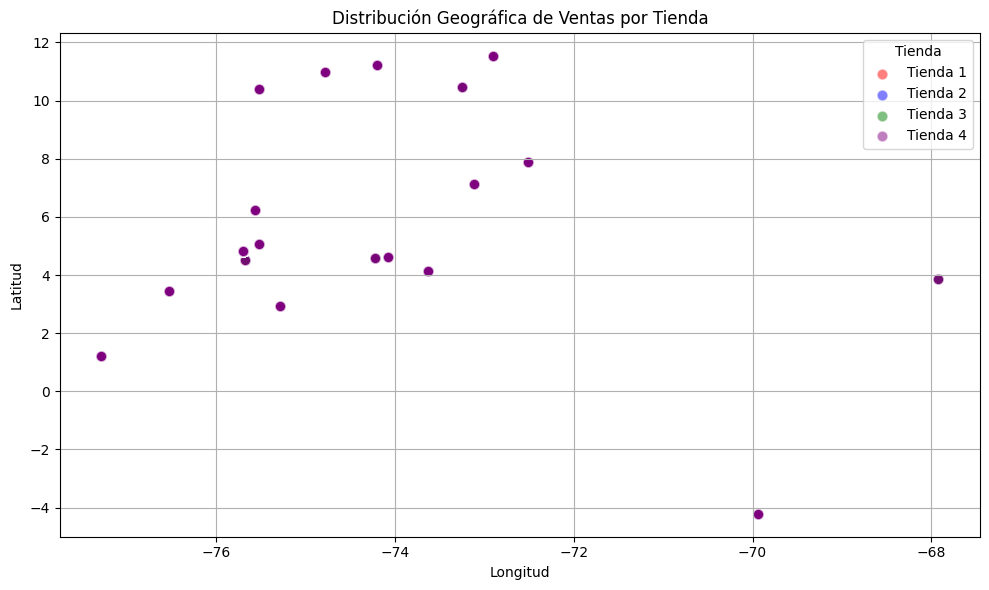

In [ ]:
# UNir todos los dataframes en uno solo, añadiendo una columna para identificar la tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

tiendas_combinadas['Tienda'] = tiendas_combinadas['Tienda'].astype(str)

# Colores para cada tienda
colors = {'Tienda 1': 'red', 'Tienda 2': 'blue', 'Tienda 3': 'green', 'Tienda 4': 'purple'}

plt.figure(figsize=(10, 6))

# Graficar cada tienda por separado
for tienda_name in tiendas_combinadas['Tienda'].unique():
    datos = tiendas_combinadas[tiendas_combinadas['Tienda'] == tienda_name]
    plt.scatter(datos['lon'], datos['lat'],
                color=colors[tienda_name],
                label=tienda_name,
                alpha=0.5,
                edgecolors='white',
                s=60)

plt.title('Distribución Geográfica de Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()






In [ ]:
!pip install folium


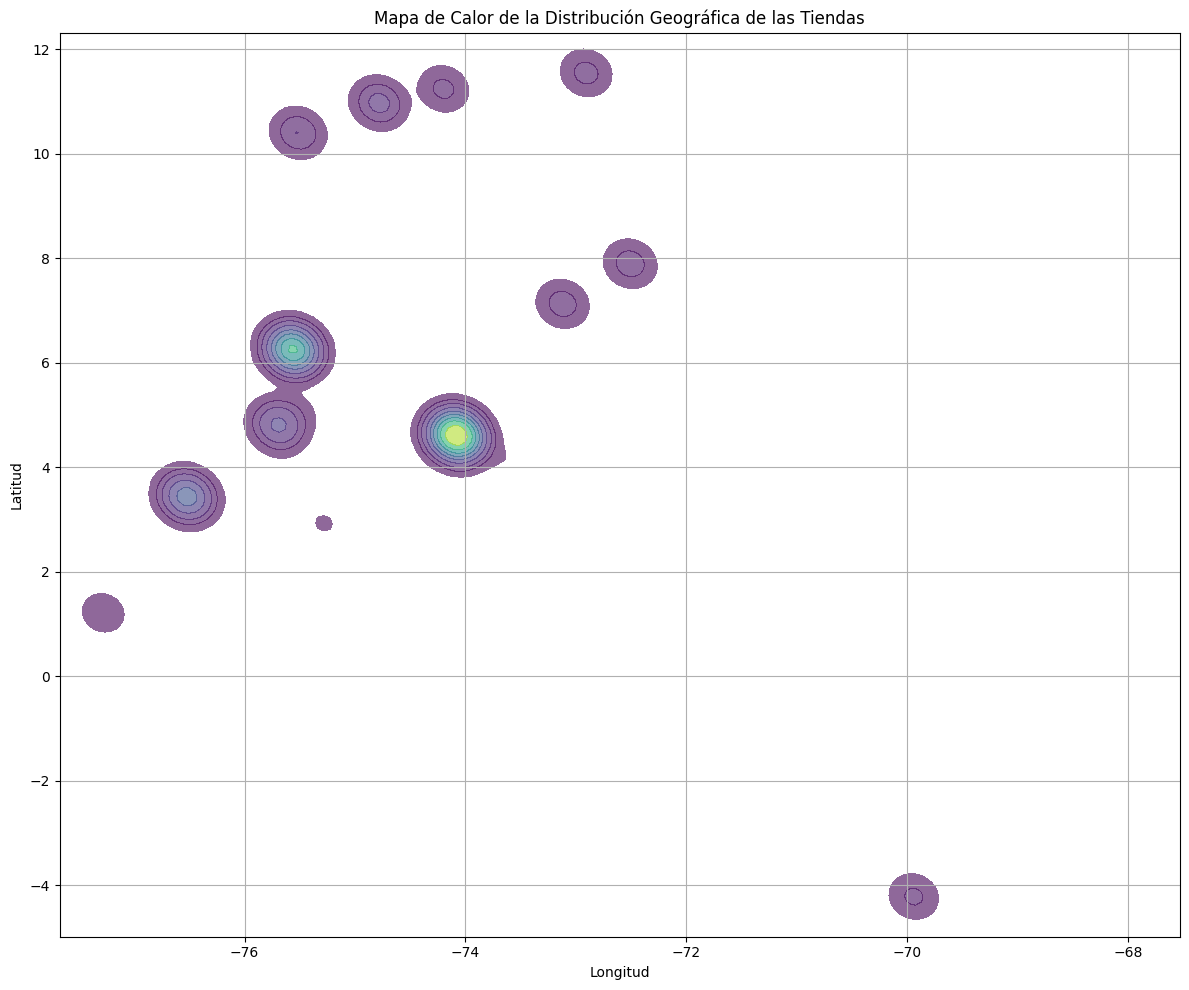

In [ ]:
# Mapa de Calor (HeatMap)

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.kdeplot(x=tiendas_combinadas['lon'], y=tiendas_combinadas['lat'], cmap='viridis', fill=True, alpha=0.6, bw_adjust=0.5)
plt.title('Mapa de Calor de la Distribución Geográfica de las Tiendas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

colores = {'Tienda 1': 'red', 'Tienda 2': 'blue', 'Tienda 3': 'green', 'Tienda 4': 'purple'}

# Crear mapa centrado en el promedio de latitud y longitud
lat_centro = tiendas_combinadas['lat'].mean()
lon_centro = tiendas_combinadas['lon'].mean()
mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=10)

# Agrupar marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Añadir marcadores al mapa
for _, fila in tiendas_combinadas.iterrows():
    folium.Marker(
        location=[fila['lat'], fila['lon']],
        popup=f"{fila['Tienda']}: {fila['Producto']}",
        icon=folium.Icon(color=colores[fila['Tienda']])).add_to(marker_cluster)

mapa

Output hidden; open in https://colab.research.google.com to view.